<a href="https://colab.research.google.com/github/muhammad-madridista/IntroductionToPytorch/blob/main/RiceTypeClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install opendatasets --quiet
import opendatasets as od
od.download("https://www.kaggle.com/datasets/mssmartypants/rice-type-classification")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: muhammadmadridista98
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/mssmartypants/rice-type-classification


100%|██████████| 888k/888k [00:00<00:00, 484MB/s]

In [1]:
import torch
import torch.nn as nn
from torch.optim import Adam
from torch.utils.data import Dataset, DataLoader
from torchsummary import summary
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

device=torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cuda


In [4]:
data_df=pd.read_csv("/content/rice-type-classification/riceClassification.csv")
data_df.head()

,id,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,EquivDiameter,Extent,Perimeter,Roundness,AspectRation,Class
0,1,4537,92.229316,64.012769,0.719916,4677,76.004525,0.657536,273.085,0.764510,1.440796,1
1,2,2872,74.691881,51.400454,0.725553,3015,60.471018,0.713009,208.317,0.831658,1.453137,1
2,3,3048,76.293164,52.043491,0.731211,3132,62.296341,0.759153,210.012,0.868434,1.465950,1
3,4,3073,77.033628,51.928487,0.738639,3157,62.551300,0.783529,210.657,0.870203,1.483456,1
4,5,3693,85.124785,56.374021,0.749282,3802,68.571668,0.769375,230.332,0.874743,1.510000,1


In [5]:
data_df.dropna(inplace=True)
data_df.drop(['id'],axis=1, inplace=True)
print(data_df.shape)

(18185, 11)


In [6]:
data_df.head()


,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,EquivDiameter,Extent,Perimeter,Roundness,AspectRation,Class
0,4537,92.229316,64.012769,0.719916,4677,76.004525,0.657536,273.085,0.764510,1.440796,1
1,2872,74.691881,51.400454,0.725553,3015,60.471018,0.713009,208.317,0.831658,1.453137,1
2,3048,76.293164,52.043491,0.731211,3132,62.296341,0.759153,210.012,0.868434,1.465950,1
3,3073,77.033628,51.928487,0.738639,3157,62.551300,0.783529,210.657,0.870203,1.483456,1
4,3693,85.124785,56.374021,0.749282,3802,68.571668,0.769375,230.332,0.874743,1.510000,1


In [7]:
print(data_df["Class"].unique())

[1 0]


In [8]:
print(data_df["Class"].value_counts())

Class
1    9985
0    8200
Name: count, dtype: int64


In [9]:
original_df=data_df.copy()

for column in data_df.columns:
  if column!="Class":
    data_df[column]=data_df[column]/data_df[column].abs().max()

data_df.head()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,EquivDiameter,Extent,Perimeter,Roundness,AspectRation,Class
0,0.444368,0.503404,0.775435,0.744658,0.424873,0.666610,0.741661,0.537029,0.844997,0.368316,1
1,0.281293,0.407681,0.622653,0.750489,0.273892,0.530370,0.804230,0.409661,0.919215,0.371471,1
2,0.298531,0.416421,0.630442,0.756341,0.284520,0.546380,0.856278,0.412994,0.959862,0.374747,1
3,0.300979,0.420463,0.629049,0.764024,0.286791,0.548616,0.883772,0.414262,0.961818,0.379222,1
4,0.361704,0.464626,0.682901,0.775033,0.345385,0.601418,0.867808,0.452954,0.966836,0.386007,1


In [10]:
X=np.array(data_df.iloc[:, :-1]) # all except last one
Y=np.array(data_df.iloc[:, -1])  # only the last one


In [11]:
X_train, X_test, y_train, y_test=train_test_split(X, Y, test_size=0.3)

In [12]:
X_test, X_val, y_test, y_val=train_test_split(X_test, y_test, test_size=0.5)

In [13]:
print(X_train.shape, X_test.shape, X_val.shape)

(12729, 10) (2728, 10) (2728, 10)


In [14]:
class dataset(Dataset):
  def __init__(self, X, Y):
    self.X=torch.tensor(X, dtype=torch.float32).to(device)
    self.Y=torch.tensor(Y, dtype=torch.float32).to(device)

  def __getitem__(self, index):
    return self.X[index], self.Y[index]

  def __len__(self):
    return len(self.X)


In [15]:
training_data=dataset(X_train,y_train)
validation_data=dataset(X_val,y_val)
testing_data=dataset(X_test,y_test)

In [37]:
train_loader=DataLoader(training_data, batch_size=32, shuffle=True)
val_loader=DataLoader(validation_data, batch_size=32, shuffle=True)
test_loader=DataLoader(testing_data, batch_size=32, shuffle=True)

In [17]:
for x,y in train_loader:
  print(x)
  print("=====")
  print(y)
  break

tensor([[0.5719, 0.7987, 0.6287, 0.9671, 0.5412, 0.7562, 0.5647, 0.6437, 0.7569,
         0.7207],
        [0.7053, 0.8803, 0.7076, 0.9641, 0.6741, 0.8398, 0.5504, 0.7266, 0.7327,
         0.7058],
        [0.5213, 0.7598, 0.5982, 0.9671, 0.4949, 0.7220, 0.6277, 0.6166, 0.7519,
         0.7207],
        [0.5964, 0.8129, 0.6497, 0.9650, 0.5689, 0.7723, 0.5503, 0.6645, 0.7408,
         0.7099],
        [0.9907, 0.9240, 0.9312, 0.9216, 0.9520, 0.9953, 0.7769, 0.8501, 0.7518,
         0.5629],
        [0.8677, 0.8718, 0.8698, 0.9239, 0.8318, 0.9315, 0.6419, 0.7587, 0.8268,
         0.5686],
        [0.6248, 0.8755, 0.6236, 0.9797, 0.5918, 0.7904, 0.5693, 0.6907, 0.7183,
         0.7965],
        [0.6286, 0.8095, 0.6806, 0.9573, 0.5987, 0.7928, 0.7779, 0.6757, 0.7550,
         0.6748]], device='cuda:0')
=====
tensor([1., 1., 1., 1., 0., 0., 1., 1.], device='cuda:0')


In [62]:
HIDDEN_NEURONS=10
class MyModel(nn.Module):
  def __init__(self):
    super(MyModel,self).__init__()
    self.input_layer=nn.Linear(X.shape[1],HIDDEN_NEURONS)
    self.linear=nn.Linear(HIDDEN_NEURONS,1)
    self.sigmoid=nn.Sigmoid()

  def forward(self,x):
    x=self.input_layer(x)
    x=self.linear(x)
    x=self.sigmoid(x)
    return x

model=MyModel().to(device)
summary(model, (X.shape[1],))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                   [-1, 10]             110
            Linear-2                    [-1, 1]              11
           Sigmoid-3                    [-1, 1]               0
Total params: 121
Trainable params: 121
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.00
----------------------------------------------------------------


In [63]:
criterion=nn.BCELoss()
optimizer=Adam(model.parameters(), lr=1e-3)

In [64]:
total_loss_train_plot=[]
total_loss_validation_plot=[]
total_acc_train_plot=[]
total_acc_validation_plot=[]

epochs=10
for epoch in range(epochs):
  total_acc_train=0
  total_loss_train=0
  total_acc_val=0
  total_loss_val=0

# Training
  for data in train_loader:
    inputs, labels=data
    prediction=model(inputs).squeeze(1)
    batch_loss=criterion(prediction, labels)
    total_loss_train+=batch_loss.item()
    acc=((prediction).round()==labels).sum().item()
    total_acc_train+=acc
    optimizer.zero_grad()
    batch_loss.backward()
    optimizer.step()

#Validation
  with torch.no_grad():
    for data in val_loader:
      inputs,labels=data
      prediction=model(inputs).squeeze(1)
      batch_loss=criterion(prediction, labels)
      total_loss_val+=batch_loss.item()
      acc=((prediction).round()==labels).sum().item()
      total_acc_val+=acc

  total_loss_train_plot.append(total_loss_train/len(train_loader))
  total_loss_validation_plot.append(total_loss_val/len(val_loader))
  total_acc_train_plot.append((total_acc_train/len(train_loader.dataset))*100)
  total_acc_validation_plot.append((total_acc_val/len(val_loader.dataset))*100)
  print(f"Epoch {epoch+1}/{epochs}")
  print(f"Train Loss: {(total_loss_train/len(train_loader))*100}")
  print(f"Train Accuracy: {(total_acc_train/len(train_loader.dataset))*100}")
  print(f"Validation Loss: {(total_loss_val/len(val_loader))*100}")
  print(f"Validation Accuracy: {(total_acc_val/len(val_loader.dataset))*100}")




Epoch 1/10
Train Loss: 60.526416956180306
Train Accuracy: 80.96472621572786
Validation Loss: 46.45705763683763
Validation Accuracy: 98.05718475073314
Epoch 2/10
Train Loss: 30.78073922488558
Train Accuracy: 98.15382198130254
Validation Loss: 19.253591898568843
Validation Accuracy: 97.83724340175954
Epoch 3/10
Train Loss: 14.156567249166308
Train Accuracy: 98.27951920810747
Validation Loss: 10.452599173714948
Validation Accuracy: 98.53372434017595
Epoch 4/10
Train Loss: 8.987486905806778
Train Accuracy: 98.48377720166549
Validation Loss: 7.532562926238359
Validation Accuracy: 98.38709677419355
Epoch 5/10
Train Loss: 6.933276242946261
Train Accuracy: 98.46806504831487
Validation Loss: 5.980452118701367
Validation Accuracy: 98.68035190615836
Epoch 6/10
Train Loss: 5.957232677522841
Train Accuracy: 98.56233796841856
Validation Loss: 5.50270535290068
Validation Accuracy: 98.46041055718476
Epoch 7/10
Train Loss: 5.37946916784361
Train Accuracy: 98.5937622751198
Validation Loss: 4.76718868432

In [65]:
# Testing
with torch.no_grad():
  total_loss_test=0
  total_acc_test=0
  for data in test_loader:
    inputs,labels=data
    prediction=model(inputs).squeeze(1)
    batch_loss=criterion(prediction, labels).item()
    total_loss_test+=batch_loss
    acc=((prediction).round()==labels).sum().item()
    total_acc_test+=acc
print(f"Test Loss: {(total_loss_test/len(test_loader))*100}")
print(f"Test Accuracy: {(total_acc_test/len(test_loader.dataset))*100}")


Test Loss: 4.005051247483163
Test Accuracy: 98.71700879765396


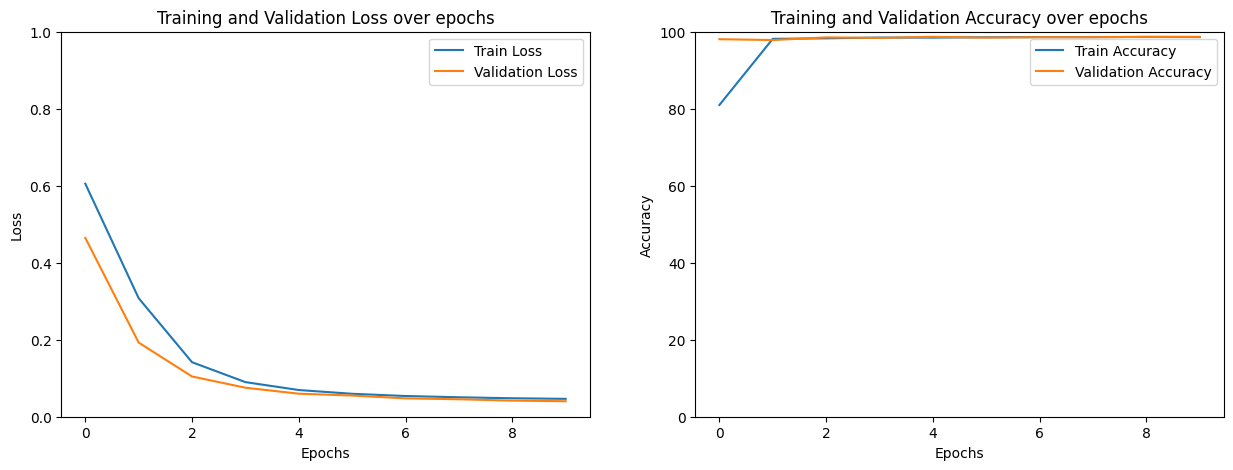

In [66]:
fig,axs=plt.subplots(nrows=1,ncols=2, figsize=(15,5))
axs[0].plot(total_loss_train_plot, label="Train Loss")
axs[0].plot(total_loss_validation_plot, label="Validation Loss")
axs[0].set_title("Training and Validation Loss over epochs")
axs[0].set_xlabel("Epochs")
axs[0].set_ylabel("Loss")
axs[0].set_ylim([0,1])
axs[0].legend()

axs[1].plot(total_acc_train_plot, label="Train Accuracy")
axs[1].plot(total_acc_validation_plot, label="Validation Accuracy")
axs[1].set_title("Training and Validation Accuracy over epochs")
axs[1].set_xlabel("Epochs")
axs[1].set_ylabel("Accuracy")
axs[1].set_ylim([0,100])
axs[1].legend()


plt.show()



In [69]:
area=2353/original_df['Area'].max()
MajorAxisLength=81/original_df['MajorAxisLength'].abs().max()
MinorAxisLength=42/original_df['MinorAxisLength'].abs().max()
Eccentricity=32/original_df['Eccentricity'].abs().max()
ConvexArea=12/original_df['ConvexArea'].abs().max()
EquivDiameter=33/original_df['EquivDiameter'].abs().max()
Extent=98/original_df['Extent'].abs().max()
Roundness=677/original_df['Roundness'].abs().max()
AspectRation=1/original_df['AspectRation'].abs().max()
Perimeter=927/original_df['Perimeter'].abs().max()

my_prediction=model(torch.tensor([area, MajorAxisLength, MinorAxisLength, Eccentricity, ConvexArea, EquivDiameter, Extent, Roundness,AspectRation,Perimeter], dtype=torch.float32).to(device))


In [71]:
if(my_prediction.item()==0):
  print(f'Gonen: {my_prediction.item()}')
else:
  print(f'Jasmine: {my_prediction.item()}')


Jasmine: 1.0
